In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib notebook

# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
# Loading data
df_data = pd.read_csv("RTA Dataset.csv")
df_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0


In [3]:
# Split target column from dataset
y = df_data['Accident_severity']
X = df_data.drop(columns='Accident_severity')

In [4]:
# Preview the data
X[:5]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking


In [5]:
# Preview target data
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: Accident_severity, dtype: int64

In [6]:
# Slight accidents = 10415 records
# Severe accidents = 1743 records
# Fatal accidents = 158 records

print(df_data['Accident_severity'].value_counts())

0    10415
1     1743
2      158
Name: Accident_severity, dtype: int64


<IPython.core.display.Javascript object>


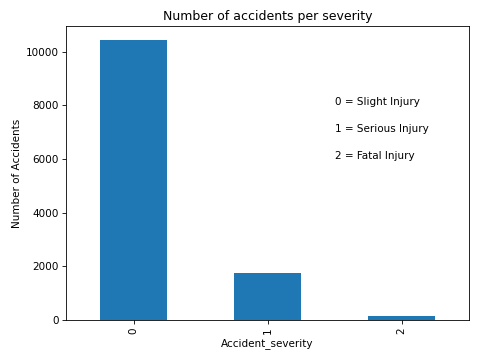

In [7]:
# Bar graph of Accident severity
count_chart = df_data['Accident_severity'].value_counts().plot(kind='bar')
count_chart.set_xlabel("Accident_severity")
count_chart.set_ylabel("Number of Accidents")

plt.title("Number of accidents per severity")
plt.text(1.5, 8000, "0 = Slight Injury")
plt.text(1.5,7000, "1 = Serious Injury")
plt.text(1.5, 6000, "2 = Fatal Injury")
plt.show()
plt.tight_layout()

In [8]:
# Converting Time column object into datetime column
df_data['Time']= pd.to_datetime(df_data['Time'])
df_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2023-04-02 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0
1,2023-04-02 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0
2,2023-04-02 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1
3,2023-04-02 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0
4,2023-04-02 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0


In [9]:
# Extrating 'Hour_of_Day' feature from the Time column
new_df = df_data.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,1


In [10]:
# Convert categorical to numerical in new dataframe
severe_df=pd.get_dummies(n_df['Accident_severity'])
severe_df_rename=severe_df.rename(columns={0:'Slight_Injury',
                                   1:'Serious_Injury',
                                    2:'Fatal_Injury'
                                   })
severe_df_rename.head()

,Slight_Injury,Serious_Injury,Fatal_Injury
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
# Concat 2 dataframes
concat_df=pd.concat([n_df,severe_df], axis='columns')
concat_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day,0,1,2
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0,17,1,0,0
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,17,1,0,0
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17,0,1,0
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,1,1,0,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,1,1,0,0


In [12]:
# Rename calumns
concat_df_rename=concat_df.rename(columns={0:'Slight_Injury',
                                   1:'Serious_Injury',
                                    2:'Fatal_Injury'
                                   })
concat_df_rename.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day,Slight_Injury,Serious_Injury,Fatal_Injury
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0,17,1,0,0
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,17,1,0,0
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17,0,1,0
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,1,1,0,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,1,1,0,0


In [13]:
# Check datatype
concat_df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [14]:
# Convert datatype to integer
concat_df_rename['Slight_Injury']=concat_df_rename['Slight_Injury'].astype(int)
concat_df_rename['Serious_Injury']=concat_df_rename['Serious_Injury'].astype(int)
concat_df_rename['Fatal_Injury']=concat_df_rename['Fatal_Injury'].astype(int)

concat_df_rename.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day,Slight_Injury,Serious_Injury,Fatal_Injury
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,0,17,1,0,0
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,17,1,0,0
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,1,17,0,1,0
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,1,1,0,0
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,0,1,1,0,0


In [15]:
# Confirming datatype was changed
concat_df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

<IPython.core.display.Javascript object>


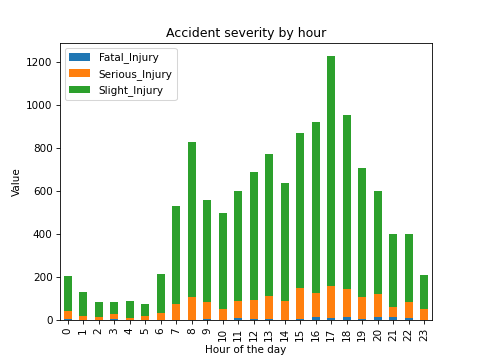

In [17]:
# Create table of accident severity based off hour of day
table = pd.pivot_table(concat_df_rename, values=['Slight_Injury', 'Serious_Injury', 'Fatal_Injury'], index=['Hour_of_Day'], aggfunc='sum')

ax = table.plot(kind='bar', stacked=True)
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Value')
ax.set_title('Accident severity by hour')
plt.show()

<IPython.core.display.Javascript object>


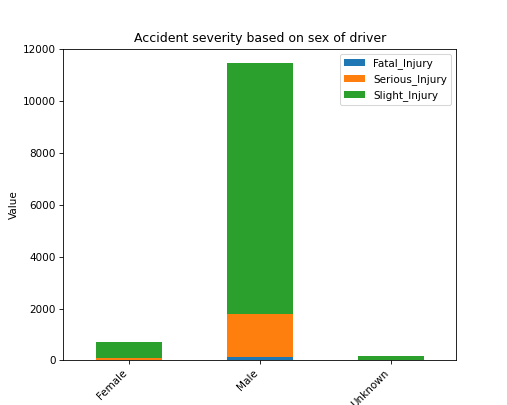

In [18]:
# Create table of accident severity based off sex of driver
table = pd.pivot_table(concat_df_rename, values=['Slight_Injury', 'Serious_Injury', 'Fatal_Injury'], index=['Sex_of_driver'], aggfunc='sum')

ax = table.plot(kind='bar', stacked=True)
ax.set_xlabel('Sex of Driver')
ax.set_ylabel('Value')
ax.set_title('Accident severity based on sex of driver')
plt.xticks(rotation=45, ha='right')
plt.show()

<IPython.core.display.Javascript object>


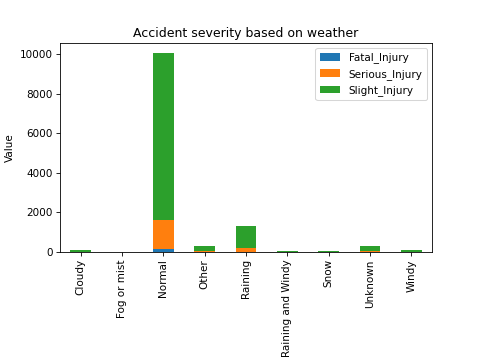

In [35]:
# Create table of accident severity based off weather
table = pd.pivot_table(concat_df_rename, values=['Slight_Injury', 'Serious_Injury', 'Fatal_Injury'], index=['Weather_conditions'], aggfunc='sum')

ax = table.plot(kind='bar', stacked=True)
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Value')
ax.set_title('Accident severity based on weather')
#plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.30)
#plt.savefig('weather.png')
plt.show()

<IPython.core.display.Javascript object>


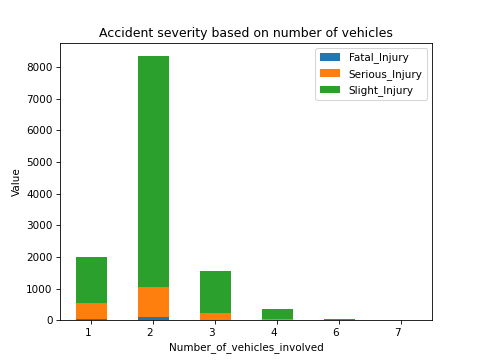

In [44]:
# Create table of accident severity based off number of vehicles
table = pd.pivot_table(concat_df_rename, values=['Slight_Injury', 'Serious_Injury', 'Fatal_Injury'], index=['Number_of_vehicles_involved'], aggfunc='sum')

ax = table.plot(kind='bar', stacked=True)
ax.set_xlabel('Number_of_vehicles_involved')
ax.set_ylabel('Value')
ax.set_title('Accident severity based on number of vehicles')
plt.xticks(rotation=0, ha='right')
plt.show()

<IPython.core.display.Javascript object>


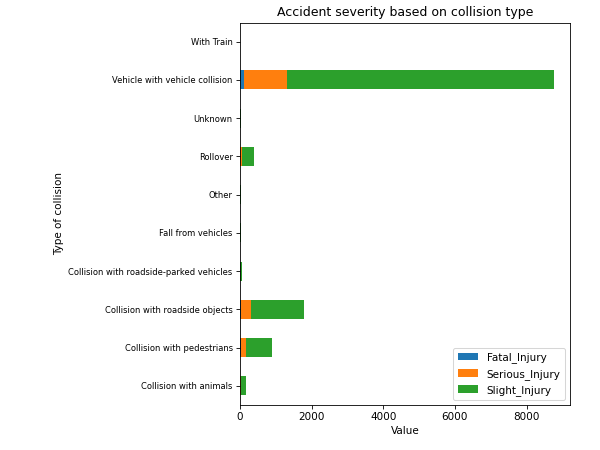

In [69]:
# Create table of accident severity based off collision type
fig, ax = plt.subplots(figsize=(8, 6))
table.plot(kind='barh', stacked=True, ax=ax)

ax.set_yticklabels(table.index, rotation=0, fontsize=8)
ax.set_xlabel('Value')
ax.set_ylabel('Type of collision')
ax.set_title('Accident severity based on collision type')
plt.subplots_adjust(left=0.4, right=0.95, top=0.95, bottom=0.1)
plt.show()

In [22]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [23]:
# Preview the data
X.head()

,Number_of_vehicles_involved,Number_of_casualties,Time_0:01:00,Time_0:02:00,Time_0:03:00,Time_0:04:00,Time_0:06:00,Time_0:08:00,Time_0:09:00,Time_0:10:00,Time_0:11:00,Time_0:15:00,Time_0:17:00,Time_0:18:00,Time_0:19:00,Time_0:20:00,Time_0:21:00,Time_0:23:00,Time_0:25:00,Time_0:26:00,Time_0:28:00,Time_0:29:00,Time_0:30:00,Time_0:31:00,Time_0:34:00,Time_0:35:00,Time_0:36:00,Time_0:40:00,Time_0:41:00,Time_0:43:00,Time_0:44:00,Time_0:45:00,Time_0:47:00,Time_0:50:00,Time_0:51:00,Time_0:52:00,Time_0:53:00,Time_0:54:00,Time_0:55:00,Time_0:56:00,Time_0:57:00,Time_10:00:00,Time_10:01:00,Time_10:02:00,Time_10:04:00,Time_10:05:00,Time_10:07:00,Time_10:08:00,Time_10:10:00,Time_10:11:00,Time_10:12:00,Time_10:13:00,Time_10:15:00,Time_10:16:00,Time_10:17:00,Time_10:18:00,Time_10:19:00,Time_10:20:00,Time_10:21:00,Time_10:22:00,Time_10:23:00,Time_10:24:00,Time_10:25:00,Time_10:26:00,Time_10:27:00,Time_10:29:00,Time_10:30:00,Time_10:31:00,Time_10:32:00,Time_10:34:00,Time_10:35:00,Time_10:36:00,Time_10:37:00,Time_10:38:00,Time_10:39:00,Time_10:40:00,Time_10:41:00,Time_10:42:00,Time_10:43:00,Time_10:44:00,Time_10:45:00,Time_10:47:00,Time_10:48:00,Time_10:49:00,Time_10:50:00,Time_10:51:00,Time_10:53:00,Time_10:54:00,Time_10:55:00,Time_10:56:00,Time_10:57:00,Time_10:58:00,Time_10:59:00,Time_11:00:00,Time_11:01:00,Time_11:02:00,Time_11:04:00,Time_11:05:00,Time_11:06:00,Time_11:08:00,Time_11:09:00,Time_11:10:00,Time_11:11:00,Time_11:14:00,Time_11:15:00,Time_11:16:00,Time_11:17:00,Time_11:19:00,Time_11:20:00,Time_11:22:00,Time_11:24:00,Time_11:25:00,Time_11:26:00,Time_11:27:00,Time_11:28:00,Time_11:29:00,Time_11:30:00,Time_11:31:00,Time_11:32:00,Time_11:33:00,Time_11:34:00,Time_11:35:00,Time_11:36:00,Time_11:37:00,Time_11:38:00,Time_11:39:00,Time_11:40:00,Time_11:41:00,Time_11:42:00,Time_11:43:00,Time_11:44:00,Time_11:45:00,Time_11:48:00,Time_11:49:00,Time_11:50:00,Time_11:52:00,Time_11:53:00,Time_11:54:00,Time_11:55:00,Time_11:56:00,Time_11:57:00,Time_11:58:00,Time_11:59:00,Time_12:00:00,Time_12:01:00,Time_12:03:00,Time_12:04:00,Time_12:05:00,Time_12:07:00,Time_12:08:00,Time_12:09:00,Time_12:10:00,Time_12:11:00,Time_12:14:00,Time_12:15:00,Time_12:16:00,Time_12:17:00,Time_12:18:00,Time_12:19:00,Time_12:20:00,Time_12:22:00,Time_12:24:00,Time_12:25:00,Time_12:26:00,Time_12:27:00,Time_12:28:00,Time_12:29:00,Time_12:30:00,Time_12:31:00,Time_12:32:00,Time_12:33:00,Time_12:34:00,Time_12:35:00,Time_12:36:00,Time_12:37:00,Time_12:38:00,Time_12:39:00,Time_12:40:00,Time_12:41:00,Time_12:42:00,Time_12:43:00,Time_12:44:00,Time_12:45:00,Time_12:46:00,Time_12:47:00,Time_12:48:00,Time_12:49:00,Time_12:50:00,Time_12:51:00,Time_12:52:00,Time_12:53:00,Time_12:54:00,Time_12:55:00,Time_12:56:00,Time_12:57:00,Time_12:58:00,Time_12:59:00,Time_13:00:00,Time_13:01:00,Time_13:02:00,Time_13:03:00,Time_13:04:00,Time_13:05:00,Time_13:06:00,Time_13:07:00,Time_13:09:00,Time_13:10:00,Time_13:11:00,Time_13:12:00,Time_13:13:00,Time_13:14:00,Time_13:15:00,Time_13:16:00,Time_13:17:00,Time_13:18:00,Time_13:19:00,Time_13:20:00,Time_13:21:00,Time_13:22:00,Time_13:23:00,Time_13:24:00,Time_13:25:00,Time_13:27:00,Time_13:28:00,Time_13:29:00,Time_13:30:00,Time_13:31:00,Time_13:32:00,Time_13:33:00,Time_13:34:00,Time_13:35:00,Time_13:36:00,Time_13:37:00,Time_13:38:00,Time_13:40:00,Time_13:41:00,Time_13:42:00,Time_13:43:00,Time_13:44:00,Time_13:45:00,Time_13:46:00,Time_13:48:00,Time_13:49:00,Time_13:50:00,Time_13:51:00,Time_13:52:00,Time_13:53:00,Time_13:54:00,Time_13:55:00,Time_13:56:00,Time_13:57:00,Time_13:58:00,Time_13:59:00,Time_14:00:00,Time_14:01:00,Time_14:02:00,Time_14:03:00,Time_14:04:00,Time_14:05:00,Time_14:06:00,Time_14:07:00,Time_14:09:00,Time_14:10:00,Time_14:11:00,Time_14:12:00,Time_14:13:00,Time_14:14:00,Time_14:15:00,Time_14:16:00,Time_14:17:00,Time_14:18:00,Time_14:19:00,Time_14:20:00,Time_14:21:00,Time_14:22:00,Time_14:23:00,Time_14:24:00,Time_14:25:00,Time_14:26:00,Time_14:27:00,Time_14:28:00,Time_14:29:00,Time_14:30:00,Time_14:31:00,Time_14:32:00,Time_14:33:00,Time_14:34:00

In [24]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Check rows and columns
X_train.shape

(9237, 1280)

In [26]:
# Check rows and columns
X_test.shape

(3079, 1280)

In [27]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Instantiate the model with k = 2 neighbors
model = KNeighborsClassifier(n_neighbors=2)

In [29]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[2566,  344,   28],
       [  59,   68,    5],
       [   5,    0,    4]], dtype=int64)

In [32]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2938
           1       0.17      0.52      0.25       132
           2       0.11      0.44      0.17         9

    accuracy                           0.86      3079
   macro avg       0.42      0.61      0.45      3079
weighted avg       0.94      0.86      0.89      3079

